In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('dirty_cafe_sales.csv')
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


None

In [33]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [34]:
for col in df.columns:
    display(df[col].value_counts())
    print("=======================")

,count
Transaction ID,
TXN_1961373,1
TXN_4831525,1
TXN_1228927,1
TXN_6486912,1
TXN_3447069,1
...,...
TXN_5680238,1
TXN_7766134,1
TXN_2617257,1


,count
Item,
Juice,1171
Coffee,1165
Salad,1148
Cake,1139
Sandwich,1131
Smoothie,1096
Cookie,1092
Tea,1089
UNKNOWN,344


,count
Quantity,
5,2013
2,1974
4,1863
3,1849
1,1822
UNKNOWN,171
ERROR,170


,count
Price Per Unit,
3.0,2429
4.0,2331
2.0,1227
5.0,1204
1.0,1143
1.5,1133
ERROR,190
UNKNOWN,164


,count
Total Spent,
6.0,979
12.0,939
3.0,930
4.0,923
20.0,746
15.0,734
8.0,677
10.0,524
2.0,497


,count
Payment Method,
Digital Wallet,2291
Credit Card,2273
Cash,2258
ERROR,306
UNKNOWN,293


,count
Location,
Takeaway,3022
In-store,3017
ERROR,358
UNKNOWN,338


,count
Transaction Date,
UNKNOWN,159
ERROR,142
2023-06-16,40
2023-02-06,40
2023-07-21,39
...,...
2023-04-27,15
2023-09-24,15
2023-07-22,14


Убираем поврежденные данные:

In [35]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%Y-%m-%d', errors='coerce')
df = df.dropna()
df = df[~df.isin(["ERROR", "UNKNOWN"]).any(axis=1)]
df = df[df['Total Spent'] == df['Quantity'] * df['Price Per Unit']]

,Total Spent
Transaction Date,
1,2749.0
2,2219.5
3,2240.0
4,2275.5
5,1844.5
6,2281.5
7,2307.0
8,2328.5
9,2426.5


<Axes: xlabel='Total Spent', ylabel='Count'>

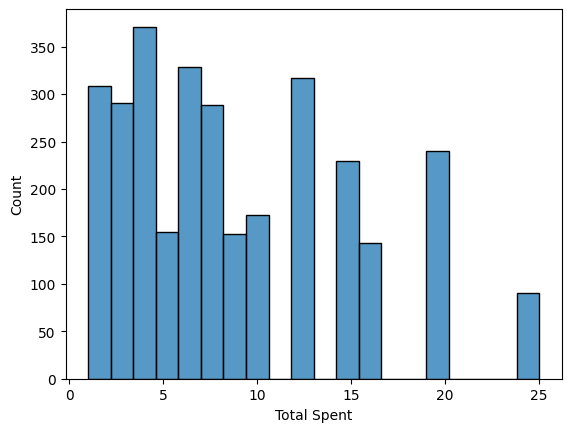

In [44]:
display(df.groupby(df['Transaction Date'].dt.month)['Total Spent'].sum())

display(sns.histplot(df['Total Spent'], bins=20))

<Axes: xlabel='Item', ylabel='Price Per Unit'>

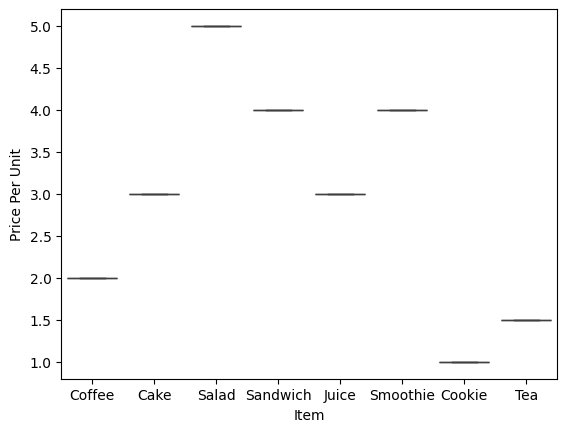

In [45]:
sns.boxplot(x='Item', y='Price Per Unit', data=df)

Цены на протяжении всего периода не изменялись

<Axes: xlabel='Transaction Date', ylabel='Total spent'>

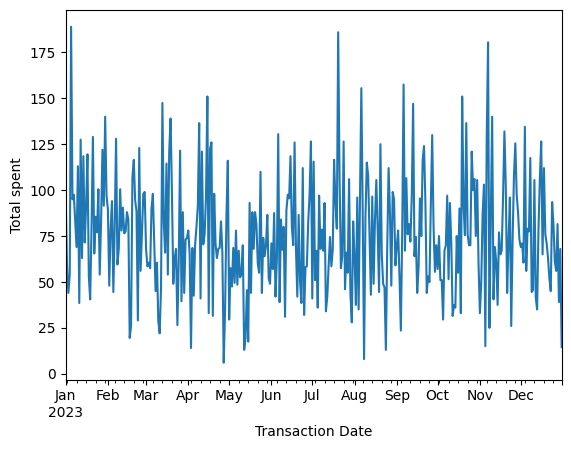

In [49]:
df.groupby('Transaction Date')['Total Spent'].sum().plot(ylabel='Total spent')

<Axes: xlabel='Transaction Date', ylabel='Total spent'>

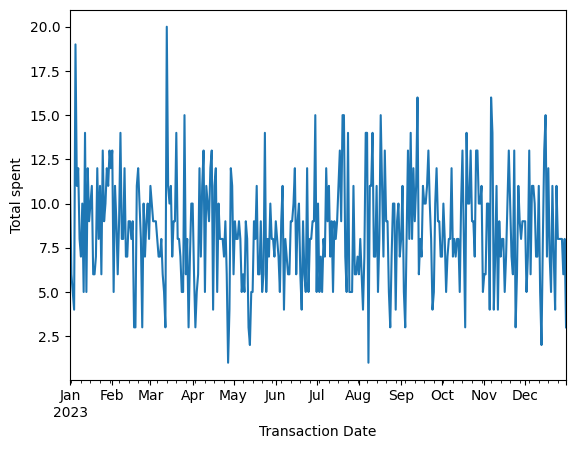

In [48]:
df.groupby('Transaction Date')['Quantity'].count().plot(ylabel='Total spent')

<Axes: xlabel='Transaction Date', ylabel='Quantity'>

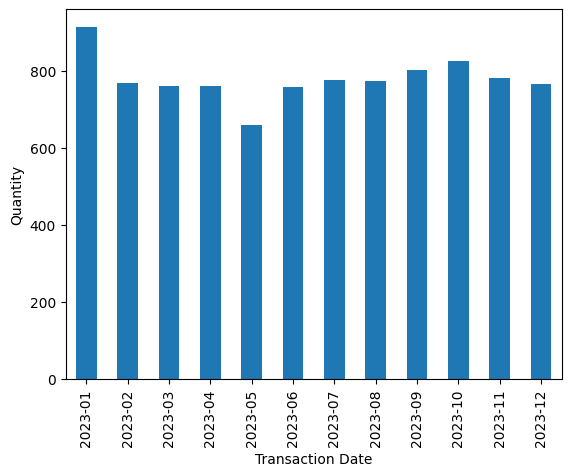

In [50]:
df.groupby(df['Transaction Date'].dt.to_period('M'))['Quantity'].sum().plot(kind='bar', ylabel='Quantity')

<Axes: xlabel='Item'>

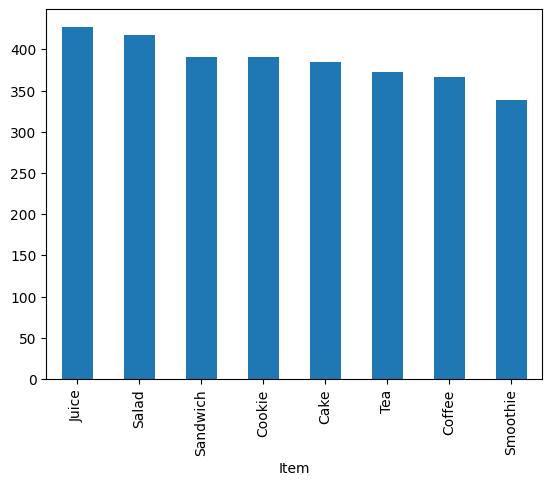

In [12]:
df['Item'].value_counts().plot(kind='bar')

<Axes: >

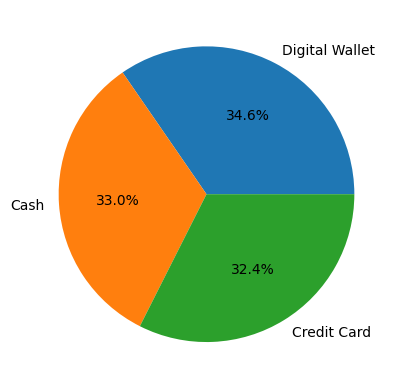

In [51]:
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')

In [52]:
df.groupby('Payment Method')['Total Spent'].mean()

,Total Spent
Payment Method,
Cash,8.920923
Credit Card,8.833333
Digital Wallet,9.048644


In [53]:
df.groupby('Payment Method')['Quantity'].mean()

,Quantity
Payment Method,
Cash,3.040275
Credit Card,2.973054
Digital Wallet,3.055192


Все три способа оплаты имеют очень близкие средние значения (примерно 3 шт)

Клиенты с цифровыми кошельками покупают чуть больше товаров, но тратят меньше денег, то есть покупают более дешевые товары

In [54]:
df.groupby('Location')['Total Spent'].mean()

,Total Spent
Location,
In-store,9.150778
Takeaway,8.723335


In [55]:
df.groupby('Location')['Quantity'].mean()

,Quantity
Location,
In-store,3.031128
Takeaway,3.016160


На вынос берут меньше по количеству и сумме.

<ipython-input-56-7e2394fc496a>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-56-7e2394fc496a>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-56-7e2394fc496a>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


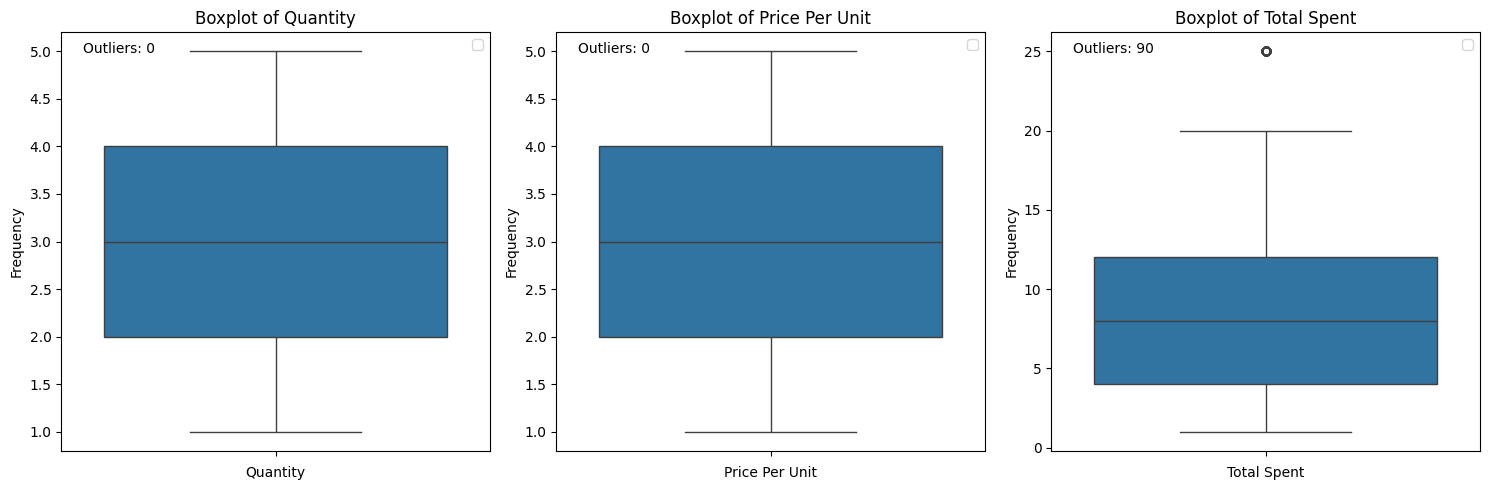

In [56]:
import matplotlib.pyplot as plt

num_features = 3
num_cols = 3
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, feature in enumerate(['Quantity', 'Price Per Unit', 'Total Spent']):
    col = i % num_cols
    ax = axes[col]

    sns.boxplot(df[feature], ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))][feature]
    ax.text(0.05, 0.95, f'Outliers: {len(outliers)}', transform=ax.transAxes, fontsize=10)


plt.tight_layout()
plt.show()

In [57]:
# Удалим выбросы по Total Spent
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Total Spent'] >= Q1 - 1.5*IQR) & (df['Total Spent'] <= Q3 + 1.5*IQR)]

In [58]:
df['Month'] = df['Transaction Date'].dt.month
df['DayOfWeek'] = df['Transaction Date'].dt.dayofweek
df['DayOfMonth'] = df['Transaction Date'].dt.day
df['WeekOfYear'] = df['Transaction Date'].dt.isocalendar().week

In [59]:
df['Is juice'] = df['Item'].str.contains('Juice')
df['Is sandwich'] = df['Item'].str.contains('Sandwich')
df['Is cookie'] = df['Item'].str.contains('Cookie')
df['Is cake'] = df['Item'].str.contains('Cake')
df['Is tea'] = df['Item'].str.contains('Tea')
df['Is coffee'] = df['Item'].str.contains('Coffee')
df['Is smoothie'] = df['Item'].str.contains('Smoothie')
df['Is salad'] = df['Item'].str.contains('Salad')

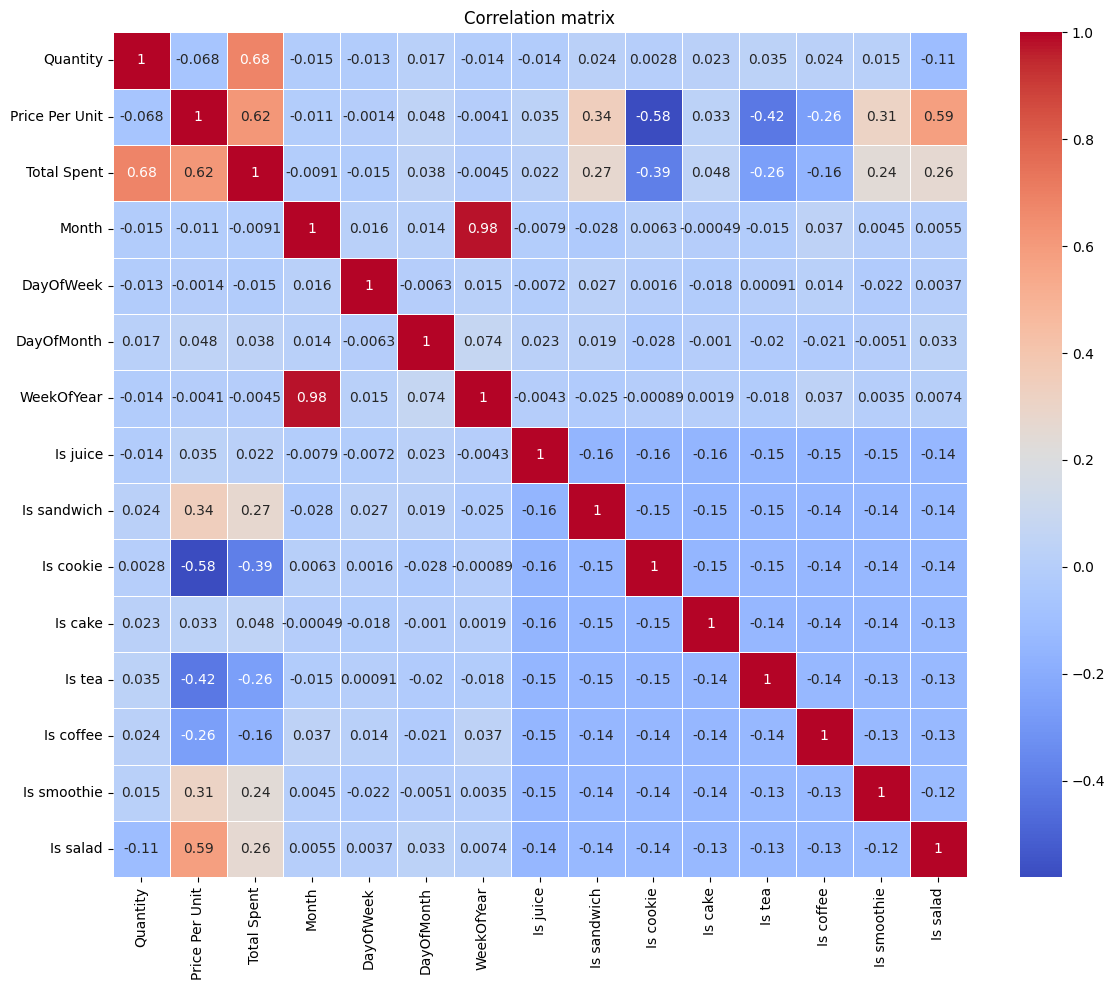

In [60]:
correlation_matrix = df.drop('Transaction ID', axis=1).drop('Item', axis=1).drop('Payment Method', axis=1) \
.drop('Location', axis=1).drop('Transaction Date', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [61]:
df = df[~df['Item'].isin(["UNKNOWN"])]

In [62]:
# Замена UNKNOWN наиболее частыми значениями
df['Payment Method'] = df['Payment Method'].replace('UNKNOWN', np.nan)
df['Location'] = df['Location'].replace('UNKNOWN', np.nan)
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [74]:
# Подготовка признаков для модели
# Группируем данные по датам для прогнозирования общего объема продаж
ds = df.groupby(['Transaction Date']).agg({
    'Quantity': 'sum',
    'Total Spent': 'sum',
    'Transaction ID': 'count'
}).rename(columns={'Transaction ID': 'Transactions Count'}).reset_index()

ds.head()

,Transaction Date,Quantity,Total Spent,Transactions Count
0,2023-01-01,32.0,97.5,11
1,2023-01-02,18.0,59.0,6
2,2023-01-03,15.0,44.0,5
3,2023-01-04,10.0,29.0,3
4,2023-01-05,55.0,164.0,18


In [75]:
# Добавление временных признаков
ds['Month'] = ds['Transaction Date'].dt.month
ds['DayOfWeek'] = ds['Transaction Date'].dt.dayofweek
ds['DayOfMonth'] = ds['Transaction Date'].dt.day
ds['WeekOfYear'] = ds['Transaction Date'].dt.isocalendar().week

In [76]:
# Добавление лагированных признаков (продажи за предыдущие дни)
for lag in [1, 2, 3, 7]:
    ds[f'Quantity_Lag_{lag}'] = ds['Quantity'].shift(lag)

ds = ds.dropna()
ds.head()

,Transaction Date,Quantity,Total Spent,Transactions Count,Month,DayOfWeek,DayOfMonth,WeekOfYear,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Lag_7
7,2023-01-08,21.0,58.0,7,1,6,8,1,32.0,38.0,55.0,32.0
8,2023-01-09,25.0,69.0,7,1,0,9,2,21.0,32.0,38.0,18.0
9,2023-01-10,26.0,88.0,9,1,1,10,2,25.0,21.0,32.0,15.0
10,2023-01-11,11.0,38.5,5,1,2,11,2,26.0,25.0,21.0,10.0
11,2023-01-12,39.0,127.5,14,1,3,12,2,11.0,26.0,25.0,55.0


In [77]:
from sklearn.model_selection import train_test_split

X = ds.drop(['Transaction Date', 'Quantity', 'Total Spent'], axis=1)
y = ds['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
!pip install catboost

In [89]:
from catboost import CatBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)
model.fit(X_train, y_train)

# Оценка
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.4f}")

# Важность признаков
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature importance:")
print(feature_importance)

# Вывод сэмплов
samples_df = X_test.copy()
samples_df['actual_value'] = y_test
samples_df['predicted_value'] = y_pred
samples_df['error'] = abs(samples_df['actual_value'] - samples_df['predicted_value'])

print(samples_df.head(10))

print("\nТоп-10 сэмплов с наибольшей ошибкой:")
print(samples_df.sort_values('error', ascending=False).head(10))

print("\nТоп-10 сэмплов с наименьшей ошибкой:")
print(samples_df.sort_values('error', ascending=True).head(10))

print("\nСтатистика ошибок:")
print(samples_df['error'].describe())

0:	learn: 8.7045286	total: 640us	remaining: 319ms
100:	learn: 2.5008332	total: 48.8ms	remaining: 193ms
200:	learn: 1.4057580	total: 93ms	remaining: 138ms
300:	learn: 0.8003005	total: 139ms	remaining: 91.6ms
400:	learn: 0.4252858	total: 186ms	remaining: 45.9ms
499:	learn: 0.2334007	total: 232ms	remaining: 0us

Model results:
MAE: 3.32
RMSE: 4.37
R^2: 0.7668

Feature importance:
              Feature  Importance
0  Transactions Count   60.738046
8      Quantity_Lag_7    6.122667
6      Quantity_Lag_2    5.491686
4          WeekOfYear    5.344888
7      Quantity_Lag_3    5.161957
5      Quantity_Lag_1    5.127611
3          DayOfMonth    5.044365
2           DayOfWeek    4.626829
1               Month    2.341951
     Transactions Count  Month  DayOfWeek  DayOfMonth  WeekOfYear  \
230                   7      8          5          19          33   
49                   10      2          6          19           7   
268                  10      9          1          26          39   
308 